<h1 style="color:#922B21"> Disaster Tweets</h1>

<img src="img1.jpg" width=600px >

<h2 style="color:#641E16;">Natural language processing </h2>
<ul>
    <li>Field of study, focused on making sense of language Using statistics and computers</li>
    <li>helps computers communicate with humans in their language and scales other language-related tasks. For example, NLP   makes it possible for computers to read text, hear speech, interpret it, measure sentiment, and determine which parts are important.</li>
</ul>
<h3 style="color:#922B21;">NLP applications include: </h3>
<ul>
<li>Chatbots </li>
<li>Translation </li>
<li>Sentiment analysis</li>
<li>...and many more!</li>
</ul>

<h2 style="color:#2980B9; font-size:35px">Twitter </h2>
<img src="tweet.jpg" width=500px style="border-radius:30%">

A lot of people now are using smartphones, which enables people to easily be on social media.

Twitter uniquely provides its users the opportunity to discover what's happening in the world. 

According to Twitter’s latest figures from the fourth quarter of 2020, the platform boasts <a href="https://s22.q4cdn.com/826641620/files/doc_financials/2020/q4/FINAL-Q4'20-TWTR-Shareholder-Letter.pdf"> 192 million daily active users </a>(Twitter, 2021). 

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programmatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are announcing a disaster, Take this example:<br>
<img src="tweet_screenshot.png" width=250px style="float:left"><br>
<pre>The author explicitly uses the word “ABLAZE” but means it metaphorically.
This is clear to a human right away, especially with the visual aid.
But it’s less clear to a machine.</pre>
<pre>This tweet can be found at <a href="https://twitter.com/AnyOtherAnnaK/status/629195955506708480">tweet source</a></pre> 

<h2 style="color:#1F618D;font-size:35px">Disaster Tweets<h2>


<p style="font-size:20px;">In this project, I built a machine learning model that predicts which Tweets are about real disasters and which ones aren’t.</p> 

<h3>Files:</h3>
<ul>
<li>train.csv - the training set</li>
<li>test.csv - the test set</li>
<li>sample_submission.csv - a sample submission file in the correct format</li>
</ul>

<h3>Columns:</h3>
<ul>
<li>id - a unique identifier for each tweet</li>
<li>text - the text of the tweet</li>
<li>location - the location the tweet was sent from (may be blank)</li>
<li>keyword - a particular keyword from the tweet (may be blank)</li>
<li>target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)</li>
</ul>

<h3>What am I predicting?</h3><br>
Predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

<h3>Data</h3><br>
This dataset was created by the company figure-eight and originally shared on their <a href="https://appen.com/open-source-datasets/">‘Data For Everyone’</a> website here.

<h2> So, Let's get started</h2>

<h3>Importing Dependencies and Data</h3>
<pre>Start by importing the dependencies and the data.
The data is stored as a comma-separated values (CSV)  file, so I will use pandas’ read_csv() function to open it into 
a DataFrame.</pre>

In [268]:
# Import libraries 
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.stem.snowball import SnowballStemmer

In [367]:
#create dataframe from csv
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_submission = pd.read_csv("data/sample_submission.csv")

<h3>Exploratory Data Analysis(EDA)</h3>
<pre>How do we get from data to answers? 
Exploratory data analysis is a process for exploring datasets, answering questions, 
and visualizing results.</pre>

In [270]:
# Get the first 5 rows of the train data
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [271]:
# Get the first 5 rows of the test data
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [272]:
# The shape of the data
df_train.shape, df_test.shape

((7613, 5), (3263, 4))

In [273]:
# Check if there are any duplicated values in the train data 
df_train.duplicated().sum()

0

In [274]:
# Check if there are any duplicated values in the test data 
df_test.duplicated().sum()

0

In [275]:
# Get the columns' names of the train data 
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [276]:
# Get the columns' names of the test data 
df_test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [277]:
# See the locations in the df_train  
df_train["location"].value_counts()

USA                                 104
New York                             71
United States                        50
London                               45
Canada                               29
                                   ... 
ANYWEHERE !!                          1
TN                                    1
Rome, Italy                           1
denver colorado                       1
Center for Domestic Preparedness      1
Name: location, Length: 3341, dtype: int64

In [278]:
# See the locations in the df_test  
df_test["location"].value_counts()

New York                     38
USA                          37
Worldwide                    16
United States                15
London                       13
                             ..
Ottawa, ON, Canada            1
Southeast Michigan (HOTH)     1
Somewhere in the Canada       1
Duo lane                      1
Alexandria, VA, USA           1
Name: location, Length: 1602, dtype: int64

In [279]:
# See the keywords in the df_train  
df_train["keyword"].value_counts()

fatalities               45
armageddon               42
deluge                   42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [280]:
# See the keywords in the df_test  
df_test["keyword"].value_counts()

deluged                  23
demolished               22
rubble                   22
obliteration             21
annihilation             21
                         ..
fatalities                5
radiation%20emergency     5
forest%20fire             5
inundation                4
epicentre                 1
Name: keyword, Length: 221, dtype: int64

In [281]:
# Delete unimportant features from train data
df_train.drop(["keyword","location"], axis=1, inplace=True)

In [282]:
# Delete unimportant features from test data
df_test.drop(["keyword","location"], axis=1, inplace=True)

In [283]:
df_train.isnull().sum()

id        0
text      0
target    0
dtype: int64

In [284]:
df_test.isnull().sum()

id      0
text    0
dtype: int64

In [285]:
# Number of Disaster Tweets
print("Disaster_Tweets_numbers: " +str(len(df_train[df_train["target"]==1])))
print("not Disaster_Tweets_numbers: " +str(len(df_train[df_train["target"]==0])))

Disaster_Tweets_numbers: 3271
not Disaster_Tweets_numbers: 4342


In [286]:
# Detect Language
from langdetect import detect
df_train["lang"] = [detect( i ) for i in df_train["text"]]
df_test["lang"] = [detect( i ) for i in df_test["text"]]

In [287]:
print("unique language in our train dataset: " +str(df_train["lang"].nunique()))

unique language in our train dataset: 28


In [288]:
print("unique language in our test dataset: " +str(df_test["lang"].nunique()))

unique language in our test dataset: 24


## PreProsessing

<h3>What is data cleaning and why is it important?</h3>

Data cleaning, or data cleansing, is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
To make our machine learning model and predict the disaster tweets, we cannot go straight from raw text to fitting the model  it is nonsense to convert unnersesary words, characters, numbers, and punctuations 

## Tokenization

### 1- Filter Out Punctuation and numbers, and tokenize the text
Tokenization is the process by which we break down articles into individual sentences or words, as needed. Besides the tokenization method provided by NLTK, we might have to perform additional filtration to remove tokens that are entirely numeric values or punctuation.
So, here I use RegexpTokenizer, which will get us text which is not words(alphabet)

In [289]:
# Remove Numbers and tokenize the text into words
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[^\d\W]+')
df_train['cleaned'] = [tokenizer.tokenize(item) for item in df_train['text']]
df_test['cleaned'] = [tokenizer.tokenize(item) for item in df_test['text']]

### 2- Stemming

Stemming is the process by which we bring down a word from its different forms to the root word.<br>
This helps us establish meaning to different forms of the same words without having to deal with each form separately. <br>
For example, the words 'fishing', 'fished', and 'fisher' all get stemmed to the word 'fish'.

In [290]:
# Perform stemming using WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
df_train['cleaned'] = df_train['cleaned'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df_test['cleaned'] = df_test['cleaned'].apply(lambda x: [stemmer.stem(y) for y in x])

In [291]:
df_train['cleaned']

0       [our, deed, are, the, reason, of, this, earthq...
1            [forest, fire, near, la, rong, sask, canada]
2       [all, resid, ask, to, shelter, in, place, are,...
3       [peopl, receiv, wildfir, evacu, order, in, cal...
4       [just, got, sent, this, photo, from, rubi, ala...
                              ...                        
7608    [two, giant, crane, hold, a, bridg, collaps, i...
7609    [aria_ahrari, thetawniest, the, out, of, contr...
7610    [m, utc, km, s, of, volcano, hawaii, http, t, ...
7611    [polic, investig, after, an, e, bike, collid, ...
7612    [the, latest, more, home, raze, by, northern, ...
Name: cleaned, Length: 7613, dtype: object

### 3- Delete stop words

Stop words are commonly used words (such as “the”, “a”, “an”, “in”)  
This words takes space in the dataset, so we are going to delete it.
For this, we can remove them easily, by storing a list of words that you consider to stop words.
We are going to use NLTK (Natural Language Toolkit), NLTK has a list of stopwords stored in 16 different languages.

In [292]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_train['cleaned'] = [item for item in df_train['cleaned'] if item not in stop]
df_test['cleaned'] = [item for item in df_test['cleaned'] if item not in stop] 

In [293]:
df_test['cleaned'] 

0                  [just, happen, a, terribl, car, crash]
1       [heard, about, earthquak, is, differ, citi, st...
2       [there, is, a, forest, fire, at, spot, pond, g...
3                     [apocalyps, light, spokan, wildfir]
4       [typhoon, soudelor, kill, in, china, and, taiwan]
                              ...                        
3258    [earthquak, safeti, los, angel, ûò, safeti, fa...
3259    [storm, in, ri, wors, than, last, hurrican, my...
3260    [green, line, derail, in, chicago, http, t, co...
3261    [meg, issu, hazard, weather, outlook, hwo, htt...
3262    [cityofcalgari, has, activ, it, municip, emerg...
Name: cleaned, Length: 3263, dtype: object

In [294]:
df_train['cleaned']

0       [our, deed, are, the, reason, of, this, earthq...
1            [forest, fire, near, la, rong, sask, canada]
2       [all, resid, ask, to, shelter, in, place, are,...
3       [peopl, receiv, wildfir, evacu, order, in, cal...
4       [just, got, sent, this, photo, from, rubi, ala...
                              ...                        
7608    [two, giant, crane, hold, a, bridg, collaps, i...
7609    [aria_ahrari, thetawniest, the, out, of, contr...
7610    [m, utc, km, s, of, volcano, hawaii, http, t, ...
7611    [polic, investig, after, an, e, bike, collid, ...
7612    [the, latest, more, home, raze, by, northern, ...
Name: cleaned, Length: 7613, dtype: object

In [295]:
# Remove single char, and char with size 2
def notT(text):
    text = text.apply(lambda x: [item for item in x if len(item)>3])
    return text
df_train['cleaned']= notT(df_train['cleaned'])
df_test['cleaned']= notT(df_test['cleaned'])

In [296]:
df_test['cleaned']

0                          [just, happen, terribl, crash]
1       [heard, about, earthquak, differ, citi, stay, ...
2       [there, forest, fire, spot, pond, gees, flee, ...
3                     [apocalyps, light, spokan, wildfir]
4                [typhoon, soudelor, kill, china, taiwan]
                              ...                        
3258     [earthquak, safeti, angel, safeti, fasten, xrwn]
3259    [storm, wors, than, last, hurrican, citi, othe...
3260     [green, line, derail, chicago, http, utbxlcbiuy]
3261       [issu, hazard, weather, outlook, http, rbqjhn]
3262    [cityofcalgari, activ, municip, emerg, plan, y...
Name: cleaned, Length: 3263, dtype: object

In [303]:
# convert text "list" to string
df_train["cleaned"] = df_train["cleaned"].apply(', '.join)
df_test["cleaned"] = df_test["cleaned"].apply(', '.join)

<h2> Let's Visualize the Data</h2>

<h3>Word Cloud</h3>

Data visualizations (like charts, graphs, infographics, and more) give a valuable way to visualize, and statistical important information, but what if your raw data is text-based? <br>
    
<span style="color:#F4D03F">Word cloud</span> generators can help simplify this process.<br>
    
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.



## Let's see what are the most occurred words 

In [438]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from random import choice


stopwords = set(STOPWORDS)

def wordCloud(tokens, plot=1):
    lemtz = WordNetLemmatizer()
    lemmatize_keywords = []
    for token in tokens:
        lemmatize_keywords.append(lemtz.lemmatize(token, wordnet.VERB))
    if plot == 1:
        plot_wordcloud(lemmatize_keywords)
    else:
        return ' '.join(lemmatize_keywords)

def plot_wordcloud(text, bg_color='salmon', cmap='rainbow'):
    c = choice(['Paired','Set2','husl','Spectral','coolwarm'])
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    wordcloud = WordCloud(width=3000, height=2000, background_color=bg_color, colormap=cmap,
                     collocations=False, stopwords=STOPWORDS, random_state=51).generate(' '.join(text))
    ax1.imshow(wordcloud)
    ax1.axis('off')
    labels = pd.Series(data=text).value_counts().index[:20]
    data = pd.Series(data=text).value_counts()[:20]
    sns.barplot(y=labels, x=data, ax=ax2, palette=c)

In [439]:
key_data = df_train['keyword'].fillna('blank').apply(lambda x:re.sub('[^a-zA-Z]+','_', x))
keywords_list = []
for keyword in key_data:
    if keyword != 'blank':
        keywords_list.extend(keyword.split())

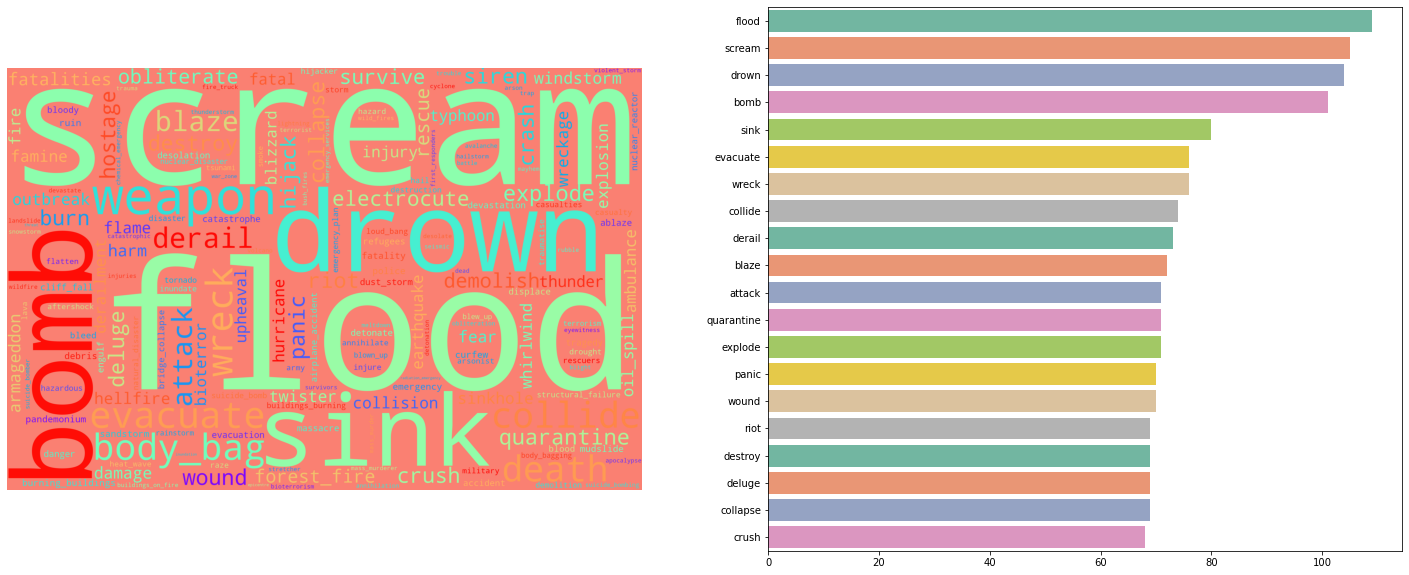

In [440]:
wordCloud(keywords_list)

## Non Disaster


In [441]:
key_data = df_train[df_train['target'] == 0]['keyword'].fillna('blank').apply(lambda x:re.sub('[^a-zA-Z]+','_', x))
keywords_list = []
for keyword in key_data:
    if keyword != 'blank':
        keywords_list.extend(keyword.split())

## WordCloud and Top20 word used in Keywords for Real Disaster¶

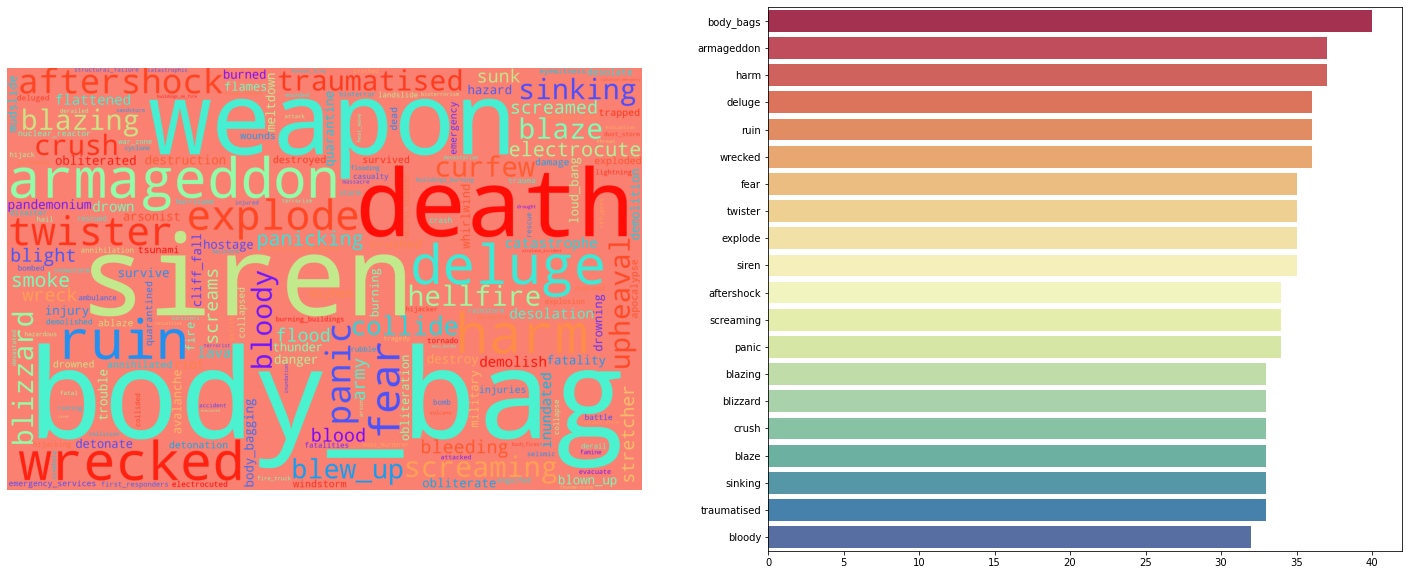

In [443]:
plot_wordcloud(keywords_list)


## Disaster

In [444]:
key_data = df_train[df_train['target'] == 1]['keyword'].fillna('blank').apply(lambda x:re.sub('[^a-zA-Z]+','_', x))
keywords_list = []
for keyword in key_data:
    if keyword != 'blank':
        keywords_list.extend(keyword.split())

## WordCloud and Top20 word used in Keywords

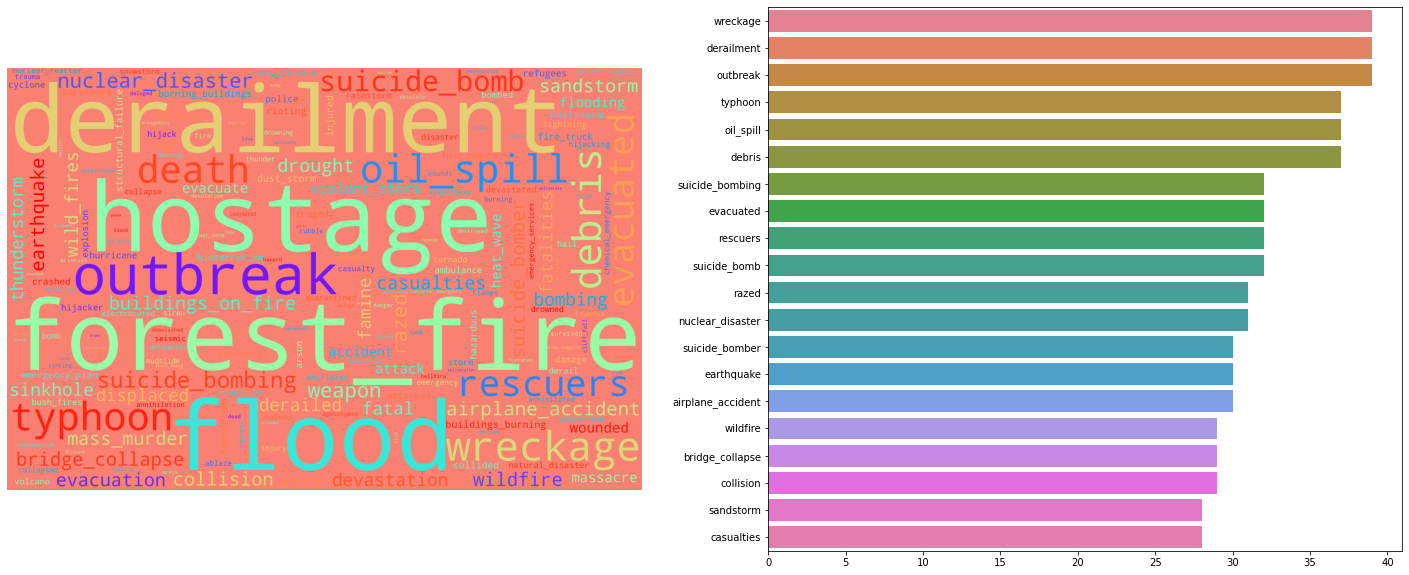

In [446]:
plot_wordcloud(keywords_list)

# Location

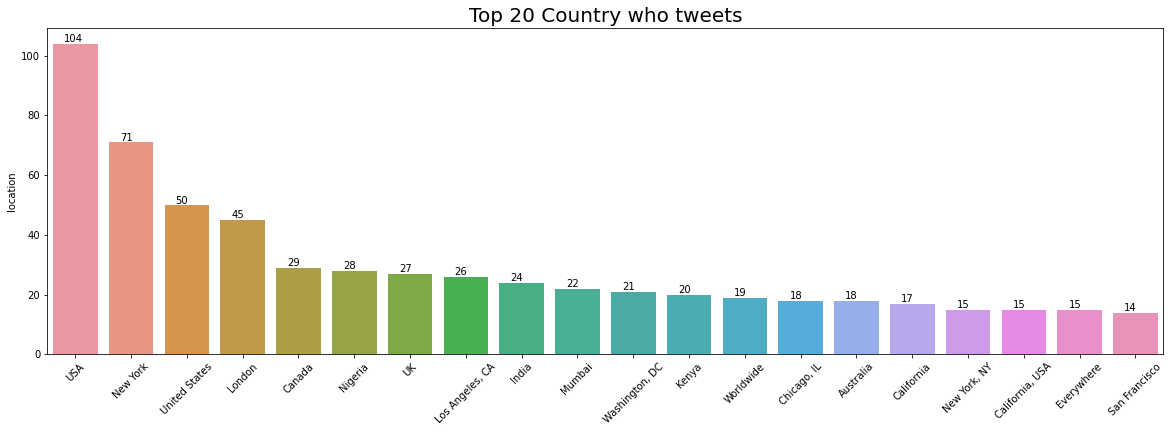

In [416]:
plt.figure(figsize=(20,6))
labels = df_train['location'].value_counts().index[:20]
data = df_train['location'].value_counts()[:20]
ax = sns.barplot(x=labels, y = data)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x()+0.2, p.get_height()+0.5))
ax.set_title('Top 20 Country who tweets', fontsize=20)
ax.set_xticklabels(labels=labels, rotation=45);

## Disaster

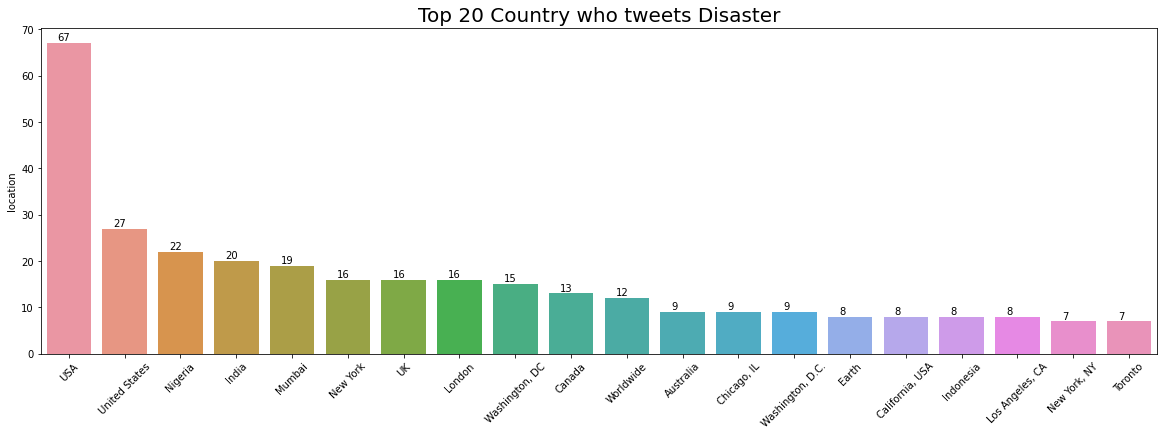

In [420]:
plt.figure(figsize=(20,6))
labels = df_train[df_train['target']==1]['location'].value_counts().index[:20]
data = df_train[df_train['target']==1]['location'].value_counts()[:20]
ax = sns.barplot(x=labels, y = data)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x()+0.2, p.get_height()+0.5))
ax.set_title('Top 20 Country who tweets Disaster', fontsize=20)
ax.set_xticklabels(labels=labels, rotation=45);

## Disaster

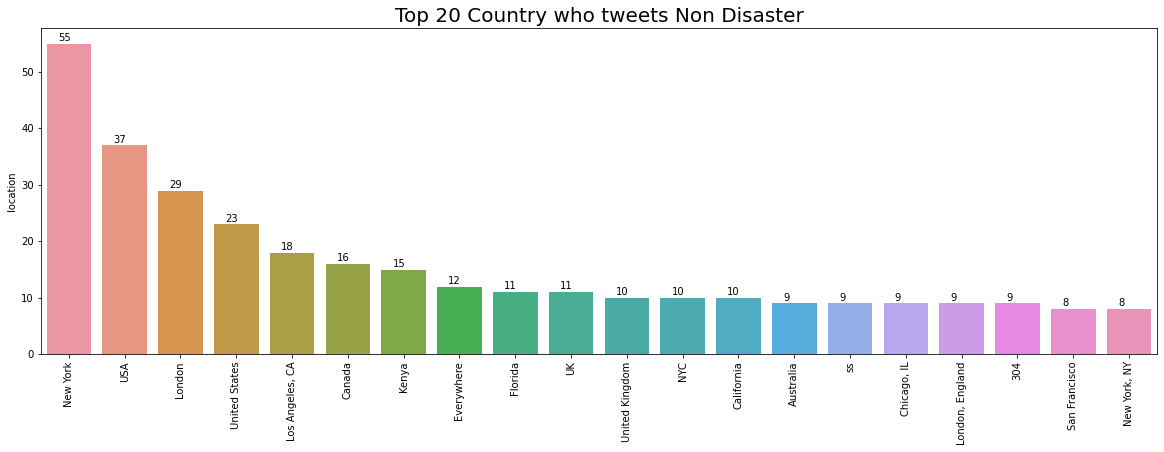

In [423]:
plt.figure(figsize=(20,6))
data = df_train[df_train['target']==0]['location'].value_counts()[:20]
labels = df_train[df_train['target']==0]['location'].value_counts().index[:20]
ax = sns.barplot(x=labels, y = data)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x()+0.2, p.get_height()+0.5))
ax.set_title('Top 20 Country who tweets Non Disaster', fontsize=20)
ax.set_xticklabels(labels=labels, rotation=90);

##  Vectorizers
Now, We have nearly cleaned the data, 
But as we said before, Computers are not like humans, it cannot understand text, machines only capable of understanding numbers and performing numerical computation. <br>
so our next step is to convert out text column to numeric data for the computer to be able to extract meaning from them. <br>

This method called, vectorizing.<br>

By vectorizing the documents we can further perform multiple tasks such as finding the relevant documents, ranking, clustering and so on.
This is the same thing that happens when you perform a google search. The web pages are called documents and the search text with which you search is called a query. google maintains a fixed representation for all of the documents. When you search with a query, google will find the relevance of the query with all of the documents, ranks them in the order of relevance and shows you the top k documents, all of this process is done using the vectorized form of query and documents. Although Googles algorithms are highly sophisticated and optimized, this is their underlying structure.

## TF-IDF

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. <br>
This is a technique to quantify a word in documents,<br>
we generally compute a weight to each word which signifies the importance of the word in the document and corpus.

From our intuition, we think that the words which appear more often should have a greater weight in textual data analysis, <br>
but that’s not always the case. <br>
Words such as “the”, “will”, and “you” — called stopwords — appear the most in a corpus of text, but are of very little significance.  <br>
Instead, the words which are rare are the ones that actually help in distinguishing between the data, and carry more weight.



TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

## TF: Term Frequency

This measures the frequency of a word in a document. <br>
we divide the the frequency with the total number of words in the document.<br>

## IDF: Inverse Data Frequency
used to calculate the weight of rare words across all documents in the corpus. <br>
The words that occur rarely in the corpus have a high IDF score.

Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. 

In [391]:
X, y = df_train['text'], df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [392]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [447]:
len(vectorizer.get_feature_names())

75467

<h1 style="color:#7733ff">Models</h1>

<img src="images.png" style="width:70%">

In [394]:
def evaluate(y_true, y_predicted):
    acc = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    return acc, precision, recall, f1

In [395]:
!pip install mlxtend

0.7813525935653316


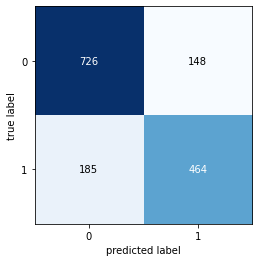

In [396]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix


clf_LR = LogisticRegression().fit(X_train_vec, y_train)
print(clf_LR.score(X_test_vec, y_test))

y_pred = clf_LR.predict(X_test_vec)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

df_LR = pd.DataFrame(data=[["Logistic Regressor", *evaluate(y_test, y_pred)]], 
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = pd.DataFrame(data=[["LogisticRegression Classifier", *evaluate(y_test, y_pred)]], 
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

0.7898883782009193


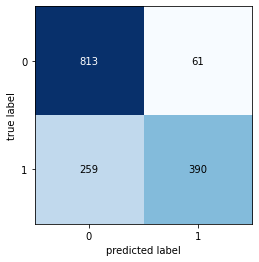

In [397]:
from sklearn.naive_bayes import MultinomialNB

clf_MNB = MultinomialNB().fit(X_train_vec, y_train)
print(clf_MNB.score(X_test_vec, y_test))

y_pred = clf_MNB.predict(X_test_vec)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

df_MNB = pd.DataFrame(data=[["Multinomial Naive Bayes Classifier", *evaluate(y_test, y_pred)]], 
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df = results_df.append(df_MNB, ignore_index=True)

0.7951411687458962


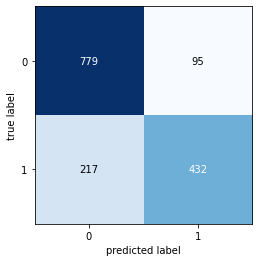

In [398]:
from sklearn.naive_bayes import ComplementNB

clf_CNB = ComplementNB().fit(X_train_vec, y_train)
print(clf_CNB.score(X_test_vec, y_test))

y_pred = clf_CNB.predict(X_test_vec)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

df_CNB = pd.DataFrame(data=[["Complement Naive Bayes Classifier", *evaluate(y_test, y_pred)]], 
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df = results_df.append(df_MNB, ignore_index=True)

<h1 style="color:#7733ff">Model Comparison</h1>

<AxesSubplot:ylabel='Model'>

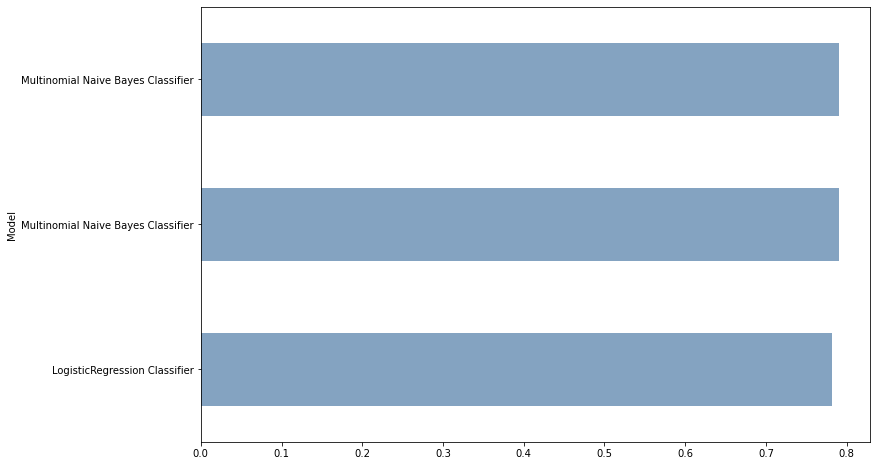

In [408]:
results_df['Accuracy'].plot(kind='barh', figsize=(12, 8),color=(0.2, 0.4, 0.6, 0.6))

<AxesSubplot:ylabel='Model'>

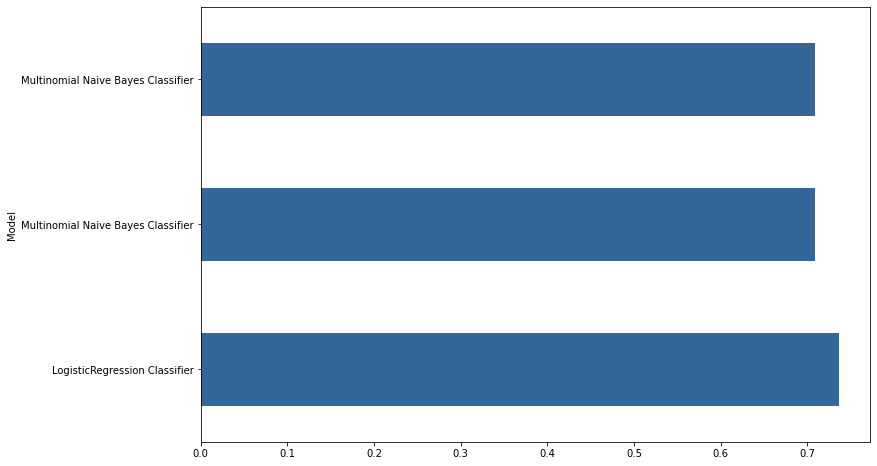

In [410]:
results_df['F1 Score'].plot(kind='barh', figsize=(12, 8),color=[0.2, 0.4, 0.6])

In [401]:
results_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
LogisticRegression Classifier,0.781353,0.758170,0.714946,0.735924
Multinomial Naive Bayes Classifier,0.789888,0.864745,0.600924,0.709091
Multinomial Naive Bayes Classifier,0.789888,0.864745,0.600924,0.709091


<h1 style="color:#7733ff">Creating Submission File</h1>

In [375]:
test_vec = vectorizer.transform(df_test['text']).toarray()
predictions = clf_CNB.predict(test_vec)

In [376]:
df_submissionn = pd.DataFrame(predictions, columns=['target'])
df_submissionn['id'] = df_test['id']
df_submissionn.set_index('id', inplace=True)

df_submissionn.to_csv('submission.csv')

In [379]:
len(predictions)


3263

In [380]:
df_submission.head()

,target
id,
0,0
2,0
3,1
9,1
11,1


In [381]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
